# Let's Find Coronal Hole: Day 1

Welcome everyone!!! In this project, we will try to locate coronal holes (CHs), define their boundary, and analyse their magnetic properties throughout their evolution.

We will python in our project. However, we do not have install any program since we can run it on a browser through Google Colab. Colab allow us to connect to computer on google server and do our python stuff through Notebook like this one for certain amount of time. 

Notebook is divided in to multiple cells which contains block of codes
- You can run each cell by pressing Shift+Enter on keyboard
- You can edit or mess around any code, it will not affect the actual source code unless you save it as a copy to github.
- To comment each line of code, type # in front of the line.

However, some python libraries we are going to use today is not availiable on Colab. Therefore, we have to download them first using the command below.

Note that Colab does not store any data once we disconnect, so we have to install these libraries every time we start a new session.

In [ ]:
# Only Run in Google colab
# Also don't forget to run it everytime we start colab because colab is a virtual machine that will not store any data
!pip install sunpy
!pip install aiapy

Then we can start coding!! Normally, first few lines of python code are used to import library or package that will be used in the program.

In [1]:
import glob

import sunpy.map
from sunpy.net import attrs as a
from sunpy.net import Fido

from aiapy.calibrate import normalize_exposure, register, update_pointing, correct_degradation

import numpy as np

import matplotlib.pyplot as plt

import astropy.time
import astropy.units as u
from astropy.coordinates import SkyCoord

import warnings
warnings.simplefilter('ignore')

Now we can start our first step, which is searching and downloading data.

Note that I already download all the data for you (which you will find out few cell later). Here I just want to show you the example, in case anyone interested.

First we have to define the time range that we want to observed.

In [2]:
#Start time
ObsTime = astropy.time.Time('2018-10-31T12:00:00',scale='utc', format='isot')
#End time
ObsTime_end = astropy.time.Time('2018-10-31T12:00:15',scale='utc', format='isot')

Then we can search for the data using Fido.search. In our case, we want the 193 A intensity data from AIA instrument during the time period define earlier.

In [3]:
q = Fido.search(
        a.Instrument.aia,
        a.Physobs.intensity,
        a.Wavelength(193*u.angstrom),
        a.Time(ObsTime, ObsTime_end),
        )

The search results are stored in variable named 'q'. We can call this variable to look at search results

In [4]:
q

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size,Info
,,,,Angstrom,,,,,,,Mibyte,
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64,str57
2018-10-31 12:00:04.000,2018-10-31 12:00:05.000,SDO,AIA,193.0 .. 193.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844,"AIA level 1, 4096x4096 [2.000 exposure] [100.00 percentd]"


If there is data according to our search, we can download it using Fido.fetch. We can also define which directory that the data is going to be stored.

In [6]:
# Only run it for google colab.
Path_data = '/content/Project_Data/'
files = Fido.fetch(q, path = Path_data)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia_lev1_193a_2018_10_31t12_00_04_84z_image_lev1.fits:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

The downloaded data will be fits file (end with .fits)

In [7]:
files

['Project_Data/aia_lev1_193a_2018_10_31t12_00_04_84z_image_lev1.fits']

Remember that Colab does not allow us to store any data. Hence, I have put the data files for this project in a google drive folder. If you follow the setup, you should have the shortcut to the folder in your google drive account.

Next is we are going to link your account to the colab session

In [ ]:
# Clone data storage
from google.colab import drive
drive.mount('/content/drive')

You will find the folder named 'LetsFindCH_data' on the file tree. This folder contains thirteen subfolders, corresponding to 13 CHs for all of us. 
Now we will access the folder of assigned CH, so please change the folder name in this cell to correspond with your folder.

In [ ]:
#Access files from data folder
#Don't forget to change CH_instuctor to your CH folder
datafolder = '/content/drive/MyDrive/LetsFindCH_data/CH_Instructor/'


Now we will load the solar images files, which are saved in .fits format

In [ ]:
filelist = sorted(glob.glob(datafolder+'/AIA193/*.fits'))
#Select first image file (first element => index 0)
#Change the image file by change the index
files = filelist[0]

Now we can read the fits file using function sunpy.map.Map

In [8]:
aiamap = sunpy.map.Map(files)

We can look at the overview of the data that is now stored in variable named 'aiamap'

Observatory,SDO
Instrument,AIA 2
Detector,AIA
Measurement,193.0 Angstrom
Wavelength,193.0 Angstrom
Observation Date,2018-10-31 12:00:04
Exposure Time,2.000084 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.600714 0.600714] arcsec / pix
Reference Pixel,[2041.01001 2042.030029] pix

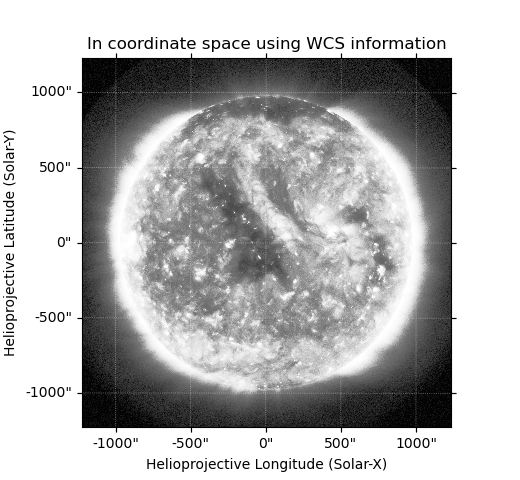
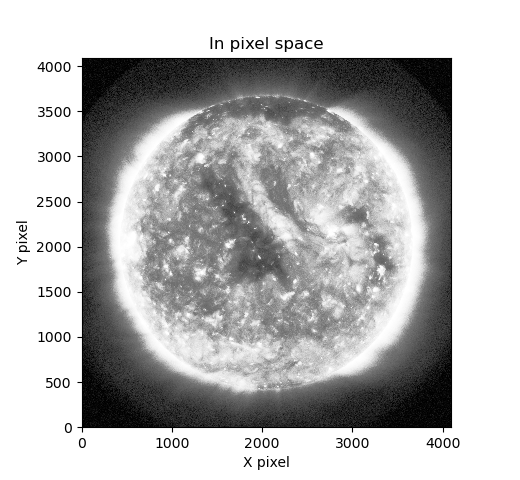
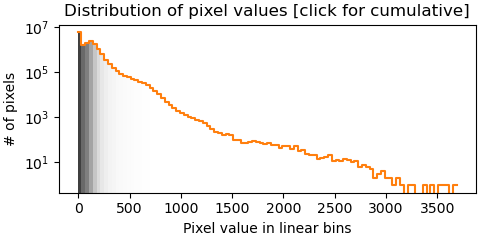
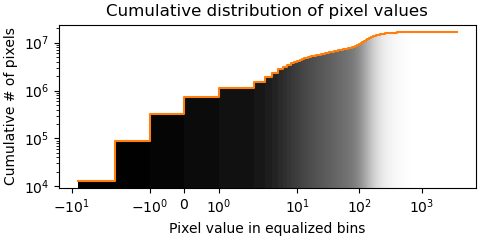

In [9]:
aiamap

Or we can take a quick look of our images using peek() function.

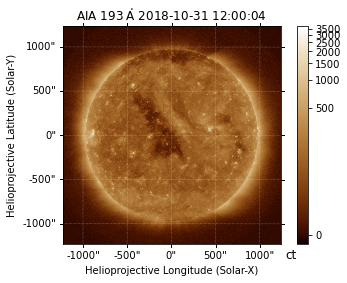

In [10]:
aiamap.peek()

aiamap variable consists two main parts. First part is the data, which contain the actual data obtain from the instruments. In case of AIA observation, this corresponds to the measured intensity. The size of array is equal to number of pixels in the map.

In [11]:
aiamap.data

array([[-1,  1,  0, ...,  2, -1, -1],
       [ 0, -2,  0, ...,  2,  0,  1],
       [ 0, -1, -2, ..., -1, -1,  1],
       ...,
       [ 1,  1,  0, ...,  1,  1,  0],
       [-2, -4,  0, ...,  1,  1, -2],
       [-2,  0,  0, ..., -2,  0, -1]], dtype=int16)

The second part is metadata, which contain all technical information related to the observation.

In [12]:
aiamap.meta

MetaDict([('simple', True),
          ('bitpix', 16),
          ('naxis', 2),
          ('naxis1', 4096),
          ('naxis2', 4096),
          ('pcount', 0),
          ('gcount', 1),
          ('xtension', 'BINTABLE'),
          ('bld_vers', 'V9R2X'),
          ('lvl_num', 1.0),
          ('t_rec', '2018-10-31T12:00:06Z'),
          ('trecstep', 1.0),
          ('trecepoc', '1977.01.01_00:00:00_TAI'),
          ('trecroun', 1),
          ('origin', 'SDO/JSOC-SDP'),
          ('date', '2018-11-04T06:45:51'),
          ('telescop', 'SDO/AIA'),
          ('instrume', 'AIA_2'),
          ('date-obs', '2018-10-31T12:00:04.84'),
          ('t_obs', '2018-10-31T12:00:05.84Z'),
          ('camera', 2),
          ('img_type', 'LIGHT'),
          ('exptime', 2.000084),
          ('expsdev', 0.0002),
          ('int_time', 2.273438),
          ('wavelnth', 193),
          ('waveunit', 'angstrom'),
          ('wave_str', '193_THIN'),
          ('fsn', 181744986),
          ('fid', 0),
          (

Some metadata can be easily access by some built-in function

In [13]:
print('Date = ', aiamap.date)
print('Unit = ', aiamap.unit)
print('Scale = ', aiamap.scale)
print('Wavelength = ', aiamap.wavelength)
print('Dimension = ', aiamap.dimensions)

Date =  2018-10-31T12:00:04.840
Unit =  ct
Scale =  SpatialPair(axis1=<Quantity 0.600714 arcsec / pix>, axis2=<Quantity 0.600714 arcsec / pix>)
Wavelength =  193.0 Angstrom
Dimension =  PixelPair(x=<Quantity 4096. pix>, y=<Quantity 4096. pix>)


Our downloaded map is only Lv.1 and is not ready for the analysis. We need to prepare the data first using the function defined below

In [15]:
#Function use to prepare map obtained from AIA
def aiaprep(aiamap):
    aiamap_updated_pointing = update_pointing(aiamap) #update metadata to recent pointing
    aiamap_registered = register(aiamap_updated_pointing) #registered: rotate align w/ solar north and rescale to match 0.6 pixel resolution
    aiamap_norm = normalize_exposure(aiamap_registered) #Normalized exposure time for each image: unit (DN/pixel/s)
    aiamap_corr = correct_degradation(aiamap_norm) #Correct Degradation effect of Instrument
    aiamap_rot = aiamap_corr.rotate()

    return aiamap_rot

In [16]:
#Structure of using function that we define by ourselves
#output = function(input)
aiamap_prep = aiaprep(aiamap)

Now take a quick look at our prepped data. You may noticed some differences.

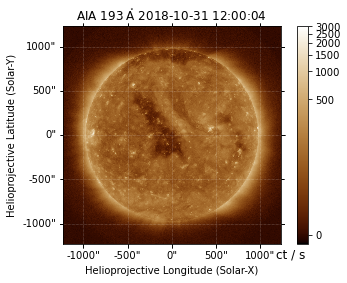

In [17]:
aiamap_prep.peek()

Next step is to zoom in to our target CH. We can do this by using submap function, which will required us to specify the coordinate of bottomleft corner, the height and width of our zoom in map.

In [20]:
# Choose submap region
bottom_left_x = -600 #x coordinate
bottom_left_y = -400 #y coordinate
w = 800 #Width
h = 1000 #Height

In [ ]:
# We define the bottomleft coordinate using SkyCoord function
bottom_left = SkyCoord(bottom_left_x * u.arcsec, bottom_left_y* u.arcsec, frame= aiamap_prep.coordinate_frame)
# Crop our map using submap function
subaiamap = aiamap_prep.submap(bottom_left, width = w*u.arcsec, height = h*u.arcsec)

Take a quick look, and change the field of view of your map until you are satisfied and the map cover entire CH.

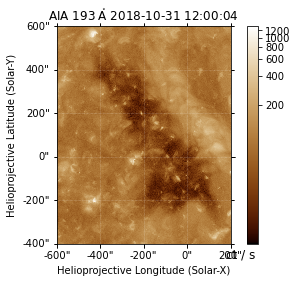

In [21]:
subaiamap.peek()

For more complex plotting, we are going to use matplotlib to plot the figure. This will be really useful when we want to overplot other stuff or customize our plot.

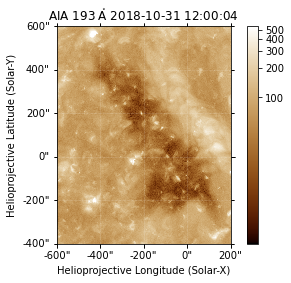

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection=subaiamap)
subaiamap.plot(clip_interval=(0,99.9)*u.percent) #clip_interval to select the range of data we want to plot
# subaiamap.draw_grid()
plt.colorbar()


You can customise the figure, plays around with them a little bit by editing the above cell (see example here: https://docs.sunpy.org/en/stable/generated/gallery/index.html#plotting) 

We can save our plots as images (png or jpg) using savefig function. (You can also right click at the image to save them as well though)

In [ ]:
#Save figure to png images
fig.savefig("CH1.png") 

The saved images will appear in the file tree, which we can download to our computer later (before disconnect from Colab)

Or if you want the data as fits file, we can do it using save function on our map. (We don't really need to use this function for this project though)

In [ ]:
subaiamap.save('AIAsubmap.fits')

If you want to explore more about what cool solar science or data analysis you can do using sunpy packages. Head over to the example gallery using this link: https://docs.sunpy.org/en/stable/generated/gallery/index.html